# TD 2 : Intervalle de confiance 


Christelle Gonindard


## 1. Rappel de cours : Intervalle de confiance

**Pourquoi calculer un intervalle de confiance**

L’objectif d'utiliser les données d’un *échantillon* pour d'estimer la valeur d'un paramètre de la *population* (ex : proportion, moyenne ou variance) dont la vraie valeur sera toujours inconnue. Cette valeur estimée sera utilisée en lieu et place de la vraie valeur du paramètre. On appelle **estimateur**, la fonction (formule mathématique) utilisée pour, estimer la valeur du paramètre de la population, à partir des données de l'échantillon. 

Le paramètre de la population que l'on cherche à estimer est souvent représenté par une lettre grecque (ex $\mu$ pour la moyenne, $\sigma$ pour l'écart-type et $\sigma^2$ pour la variance). Ces lettres font référence aux vraies valeurs de ces paramètres dans la population. Ces valeurs sont pour ainsi dire toujours inconnues. Lorsque fait référence aux valeurs estimées de ces paramètres, on met un $\textcolor{red}{\hat{~}}~$ sur le paramètre : 
$\hat{\mu}$, $\hat{\sigma}$, et $\hat{\sigma^2}$.

Ces estimations utilisent une variable aléatoire, laquelle contient une valeur pour chaque observation de l'échantillon. Mais ces estimations sont aussi elles-mêmes une variable aléatoire puisque leur valeur n'est pas contrôlée par la ou le scientifique, et si l'on répète plusieurs fois l'échantillonnage et l'estimation, on n'aura jamais exactement la même valeur.

Par exemple, si l'on a une population de 1000 individus, dont on cherche la concentration moyenne ($\mu$) de l'hormone sérotonine pendant une canicule, mais que l'on n'a pas les moyens de mesurer celle-ci dans les 1000 individus. On peut estimer $\mu$ en mesurant la concentration dans 10 individus choisit aléatoirement parmi les 1000. La moyenne de la concentration de l'hormone chez nos 10 individus est notée $\hat{\mu}$ parce qu'elle est une estimation de $\mu$. 

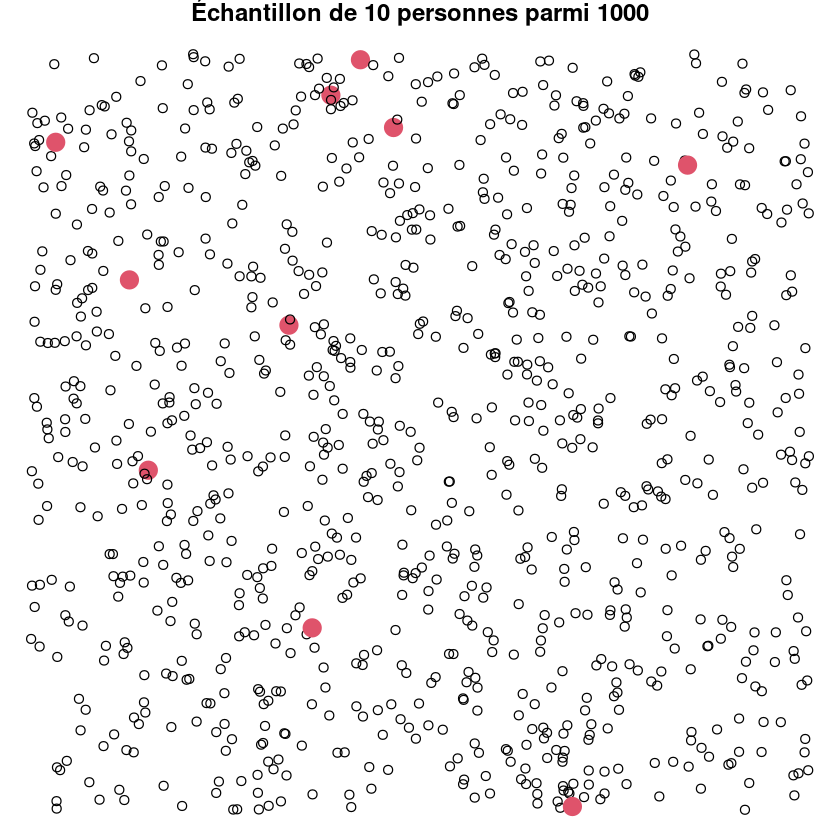

In [1]:
n = 1000 ; par(mar=c(0,0,1,0)) ; D = sapply(1:2,function(ax)runif(n)) ; samp = is.element(1:n,sample(1:n,10)) ; plot(D, main = "Échantillon de 10 personnes parmi 1000", ann = T, bty = 'n' , xaxt = 'n', yaxt = 'n',col=(samp+1),pch = c(1,19)[samp+1], ,cex = c(1,2)[samp+1])

Mettons maintenant que l'on s'interroge sur la fiabilité de notre estimation, car 10 individus, c'est finalement très peu. À ce stade, nous sommes vraiment très débutants en statistique. Pour estimer la fiabilité de notre estimation sur 10 individus, nous décidons très simplement de réaliser 4 autres échantillonnages de 10 individus et de calculer sur chacun la concentration moyenne de l'hormone, pour voir si l'on trouve grosso-modo toujours le même résultat, ou s'il varie beaucoup entre échantillons. Il en résulte au total 5 valeurs de $\hat{\mu}$ :

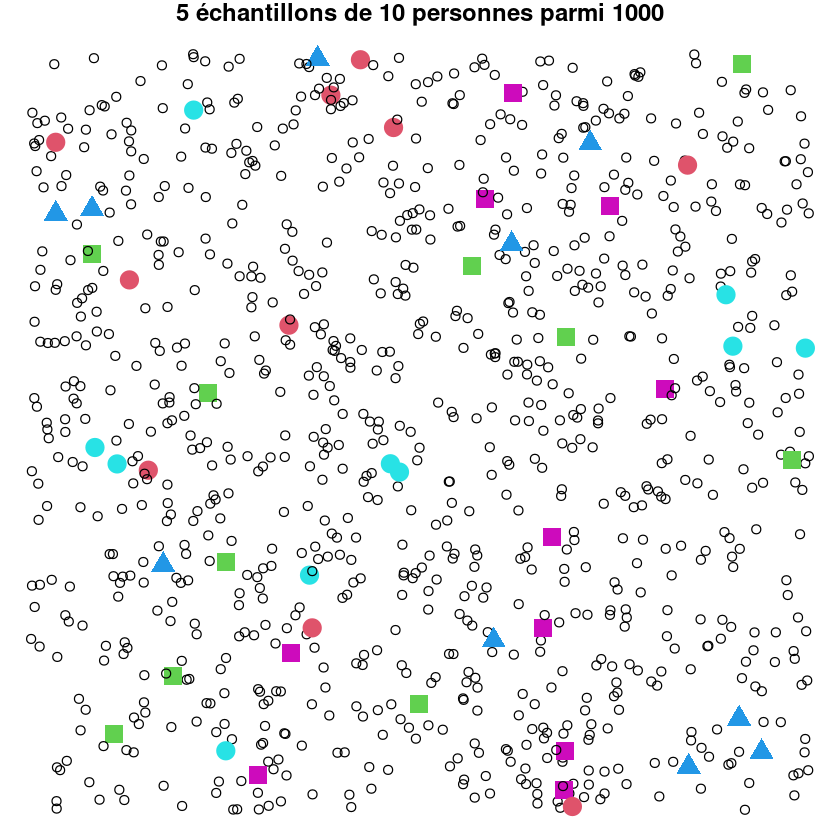

In [2]:
samp_ = list(samp) ; for(ech in 2:5){samp_[[ech]] = is.element(1:n,sample(c(1:n)[!is.element(1:n,unlist(lapply(samp_,which)))] ,10))} ; samp = rep(1,n) 
for(ech in 1:5){if(any(samp[samp_[[ech]]] != 1) ){print(ech) ; stop("any(samp[samp_[[ech]]] != 1)")} ; samp[samp_[[ech]]] = ech+1} ; par(mar=c(0,0,1,0)) ; plot(D, main = "5 échantillons de 10 personnes parmi 1000", ann = T, bty = 'n' , xaxt = 'n', yaxt = 'n',col=samp,pch = c(1,19,15,17,19,15)[samp],cex = c(1,2,2,2,2,2)[samp])

On peut donc calculer la moyenne des 5 estimations $\hat{\mu}$ et leur variance : <br>
$$E(\hat{\mu}) = \frac{\hat{\mu}_1+\hat{\mu}_2+\hat{\mu}_3+\hat{\mu}_4+\hat{\mu}_5}{5} = \frac{\sum_{ech=1}^{5}(\hat{\mu}_{ech})}{5}$$

$$Var(\hat{\mu}) = \frac{\sum_{ech=1}^{5}\{(\hat{\mu}_{ech} - E(\hat{\mu}))^2\}}{5-1}$$


Mathématiquement, on peut montrer que, calculer la moyenne des $\hat{\mu}_{1~à~5}$ (i.e : $E(\hat{\mu})$) revient à calculer la moyenne sur l'ensemble des 50 individus. Cela nous donne donc simplement une estimation plus précise de $\mu$. En revanche, la variance des $\hat{\mu}$ (i.e. : $Var(\hat{\mu})$) nous informe sur le niveau de fiabilité de nos 5 estimations basées sur 10 individus. **Ainsi, en statistique, l'incertitude, c'est de la variance :** la variance qui serait observée si l'on répétait de nombreuse de fois l'échantillonnage de la population et l'estimation sur chaque échantillon.

Avec ces 5 échantillonnages, on a donc pu obtenir 5 estimations de la concentration moyenne de sérotonine dans la population ($\hat{\mu}_{ech}$) et une mesure de la précision de ces estimations $(Var(\hat{\mu}))$. Cependant, il est possible d'obtenir à moindres frais une estimation encore plus précise de $\mu$ en fusionnant tous nos échantillons pour calculer la moyenne globale $\hat{\mu}_{1,2,3,4,5}$.

**Quelle est la précision de cette nouvelle estimation de $\mu$ basée sur 50 observations ?**

On ne peut pas se permettre de réaliser à nouveau 4 échantillonnages, cette fois-ci de 50 individus, pour estimer la précision d'une estimation basée sur 50 observations.

Pour sortir de ce problème, on va utiliser le fait qu'il y a un **lien direct entre la variabilité de $\hat{\mu}$** (c-à-d son incertitude), **la taille de l'échantillon ($n$), et la variabilité entre individus dans la population ($\sigma^2$)**.

En effet, le théorème central limite nous enseigne que *lorsque $n$ est grand*, la variable aléatoire $\hat{\mu}$ suit la loi normale $N(\mu, \frac{\sigma^2}{n})$ :

<img src="Figures/IllustrationTheoremeCentral.png" />

$\longrightarrow$ jouer avec le fichier `Illustration du théorème central limite.R`.

Ainsi, grâce à ce théorème, même avec un seul échantillonnage de taille $n$, on **sait** que si l'on répétait plein de fois l'échantillonnage, l'ensemble des estimations de $\hat{\mu}$ que l'on obtiendrait auraient un écart-type de $\sigma/\sqrt{n}$. Ceci nous informe sur la fiabilité de $\hat{\mu}$ en tant qu'estimateur de $\mu$, mais cela ne nous permet pas de calculer un intervalle de confiance.
Pour calculer un intervalle de confiance, il nous faut aussi considérer que, l'ensemble des estimations de $\hat{\mu}$ suivraient une loi normale $N(\mu,\frac{\sigma^2}{n})$.

Étant donné les propriétés d'une loi normale : 
<img src="Figures/gauss_normale_1.96_.png" /> <br>
/!\ sur cette figure, le symbole $\sigma$ fait référence à l'écart-type de la loi normale, c.-à-d., à écart-type de la population divisé par $\sqrt{n}$ <br>
$\alpha$ correspond au risque de se tromper que l'on accepte : la moyenne de la population a une probabilité $\alpha$ de se situer dans la région en blanc.

<span style="color:red">**L'intervalle de confiance à 95% de $\mu$ est donné par $\hat{\mu}\pm[\frac{\sigma}{\sqrt{n}}\times1.96]$.**</span>

Autrement dit, la valeur de $\mu$ pour la population, celle que l'on cherche à estimer, a 95% de chance de se situer entre <br>
$\hat{\mu}-\frac{\sigma}{\sqrt{n}}\times1.96$ et $\hat{\mu}+\frac{\sigma}{\sqrt{n}}\times1.96$

**Problème !**

Pour calculer cet intervalle de confiance, on a besoin de connaitre $\sigma$, qui correspond à l'écart-type de la *population*.

On peut estimer $\sigma$ avec $\hat{\sigma}=\frac{\sum_{i=1}^{n}(x_i - \hat{\mu})^2}{n-1}$, mais l'imprécision de l'estimation de $\sigma$ n'est pas prise en compte par le théorème central limite.

# En pratique,
on considère que l'approximation de $\sigma$ par son estimateur $\hat{\sigma}$ est suffisamment précise lorsque $n\geq30$. Ce seuil de $n\geq30$ permet aussi de s'assurer que la variable aléatoire $\hat{\mu}_x$ suit bien une loi normale quelle que soit la distribution de la population X dont x est un échantillon.
Ainsi, lorsque $\textcolor{red}{n \geq 30}$, on utilise simplement la formule $\textcolor{red}{\hat{\mu}\pm[\frac{\hat{\sigma}}{\sqrt{n}}\times1.96]}$.
Lorsque $\textcolor{red}{n < 30}$, on peut utiliser la distribution de Student qui est en quelque sorte une distribution normale corrigée pour les petits échantillons. Cependant, pour cette distribution, il est nécessaire que la variable étudiée (ici la concentration de sérotonine lors d'une canicule) suive une loi normale. On peut aussi utiliser des bootstraps. Cette dernière technique <ins>dépasse le cadre de ces cours</ins>, mais si cela vous intéresse : liens [1](https://www.youtube.com/watch?v=gcPIyeqymOU), [2](https://www.youtube.com/watch?v=STGGniMV0jg&list=PLdxWrq0zBgPV3qHLzRzPhnIXB-2gscdxJ) et [3](https://www.youtube.com/watch?v=I4ra13rqrH4&t=90s).

Pour d'autres versions de ces explications sur les intervalles de confiance basés sur le théorème centrale limite : liens [1](https://www.youtube.com/watch?v=jXMXlV8VysQ), [2](https://www.youtube.com/watch?v=JNm3M9cqWyc), [StatQuest_1](https://www.youtube.com/watch?v=rzFX5NWojp0), [StatQuest_2](https://www.youtube.com/watch?v=TqOeMYtOc1w) (`StatQuest` est souvent une très bonne ressource pour comprendre les statistiques de base).

La loi de Student tend vers une loi normale lorsque $n$ tend vers l'infini, et en pratique, les deux lois sont à peu près indissociables quand $n\geq30$. Il est donc aussi correct de toujours utiliser la loi de Student pour les intervalles de confiance, lorsque soit $n\geq30$, soit l'échantillon semble suivre une loi normale.

<img src="Figures/TD1_8.jpeg" />

Expliquez pourquoi sur cette figure, les 5 intervalles de confiance n'ont pas la même position, ni la même dimension.

\# Réponse <br>
La formule de l'intervalle de confiance est $[\hat{\mu}-\frac{\hat{\sigma}}{\sqrt{n}}\times1.96 ~;~ \hat{\mu}+\frac{\hat{\sigma}}{\sqrt{n}}\times1.96]$. <br>
D'un échantillon à l'autre, $\hat{\mu}$ varie, ce qui affecte la position de l'intervalle de confiance, et $\hat{\sigma}$ varie, ce qui affecte la dimension de l'intervalle.

## 2. Présentation des données

Un clinicien évalue l’intensité de la dépression sur l’échelle d'Hamilton qui varie de 0 (non déprimé) à 56 (très déprimé), chez 100 patients souffrant d’un Épisode Dépressif Majeur (EDM) lors d'une canicule. On veut savoir si l’acupuncture améliore l’évolution de la dépression. Les patients ne sont pas apparentés et ne se connaissent pas, on considère qu'ils sont **indépendants les uns des autres**. Pour cela, 100 malades de même état dépressif (même score d'Hamilton) sont répartis en 2 groupes de 50 par tirage au sort. Le groupe I a reçu uniquement le traitement pharmacologique et le groupe II a reçu le traitement pharmacologique associé à de l’acuponcture. Le jeu de données contient les variables suivantes :
- Hamilton_G1 : Les scores d'Hamilton, après traitement pour le groupe 1
- Hamilton_G2 : Les scores d'Hamilton, après traitement pour le groupe 2
- Age_G1 : l’âge des patients du groupe 1
- Age_G2 : l’âge des patients du groupe 2
- poids_G1 : le poids des patients du groupe 1
- poids_G2 : le poids des patients du groupe 2
- sexe_G1 : le sexe des patients du groupe 1
- sexe_G2 : le sexe des patients du groupe 2
- Urbanisation_G1 : le niveau d’urbanisation dans lequel vivent les patients du groupe 1 (A : rural, B : urbanisation modérée, C : fortement urbanisé)
- Urbanisation_G2 : le niveau d’urbanisation dans lequel vivent les patients du groupe 2 (A : rural, B : urbanisation modérée, C : fortement urbanisé)

Les données sont contenues dans le fichier texte : `data_Depression.txt`

Le chargement des données dans **R** se fait à partir de la fonction read.table :

In [3]:
# L'argument h=T qui signifie header est vraie permet de préciser que le fichier de données 
# possède une ligne en début qui correspond au nom des colonnes


# Afficher le début du contenu du fichier de données 


## 3. Calcul de l'intervalle de confiance

**Question : Quel est l’intervalle de confiance de la moyenne des scores d'Hamilton du groupe 1 pour les individus de sexe féminin ?**

### 3.1 Construction du jeu de données qui permet de répondre à la question

La réponse à cette question demande en premier :
- de construire un jeu de données contenant l’ensemble des scores d'Hamilton du groupe 1 pour les individus de sexe féminin.
- d'afficher la taille de l'échantillon
- de tracer l'histogramme 
- de tracer le boxplot

In [1]:
# Extraction des données

# Affichage des données extraites

# taille de l'échantillon

# tracer l'histogramme 

# tracer du boxplot


ERROR: Error in eval(expr, envir, enclos): object 'femme_G1' not found


### 3.2 Calcul des paramètres de l'échantillon

Décrire l'échantillon en calculant :
- la moyenne
- la variance
- l'écart-type
- afficher le résumé statistique

Commenter vos résultats

La moyenne du score d'Hamilton des femmes du groupe G1 est de 41.6, elle a été obtenue à partir d’un petit échantillonnage de seulement 11 patientes avec un écart-type d’environ 3.5. Cette estimation de la moyenne ne représente donc pas la valeur exacte du score d'Hamilton pour toutes les femmes qui auraient reçu le traitement, mais uniquement une estimation. Si nous échantillonnons dans les mêmes conditions un autre groupe de femmes, la valeur de la moyenne et l'écart-type estimé changeraient sensiblement. Il est donc important de calculer l’intervalle de confiance afin d’avoir une idée bornes entre lesquelles se situe la moyenne de l'ensemble de la population.

**Avant le calcul de l’intervalle de confiance, il faut vérifier les conditions d’application :**
- Si la taille de l’échantillon est grande ($n \geq 30$) : pas de condition d’application
- Si la taille de l’échantillon est petite ($n < 30$) : il faut que les données suivent une loi normale, et qu'il y ait suffisamment de données pour que $\hat{\sigma}$ soit assez précis.

### 3.3 Test de Normalité de l'échantillon

Une méthode graphique permet de vérifier cette normalité en traçant les quantiles de l’échantillon en fonction des quantiles d’une loi normale. Plus les données seront proches de la normalité, plus les points s’aligneront sur une droite.

In [ ]:
qqnorm(femme_G1)
qqline(femme_G1)

### /!\ Seulement si vous avez de l'avance par rapport au reste du groupe :
### Si vous souhaitez comprendre en détail ce que font ces 2 fonctions, vous pouvez décommenter le code ci-dessous et chercher à comprendre ce qu'il fait.
# n = 50        # taille du jeu de données simulé
# x = rnorm(n)  # simulation du jeu de données
# 
# (p = (1:n - 0.5)/n ) # choix des quantiles ; formule qui n'est que la moyenne de 
# (1:n)/n              ça et
# (0:(n-1))/n          ça.
# 
# # ?qnorm
# theoriticalQuantiles =  qnorm(p, lower.tail = T, log.p = F)
# 
# par(mfrow = c(1,2))
# plot(theoriticalQuantiles, sort(x))
# abline(lm(sort(x) ~ theoriticalQuantiles))
# 
# qqnorm(x)
# qqline(x)



Globalement, les quantiles observés de l’échantillon (points) s’alignent bien avec la droite
des quantiles théoriques de la loi normale. Il semblerait que les données suivent bien une
loi normale. S'ils ne s’alignent pas parfaitement, c'est probablement dû à un "effet d'échantillonnage" : l'effet combiné de la faible
taille des échantillonnages et de la variabilité des données.

Il est aussi possible d’avoir une approche basée sur un test statistique, par exemple en calculant la "statistique observée" W du test de Shapiro-Wilk. Pour cela, la fonction `shapiro.test` permet à la fois de calculer cette valeur `W` et de la comparer sa distribution attendue sous l’hypothèse nulle de normalité des données.

$H_0$ : la distribution suit une loi normale.
$H_1$ : la distribution ne suit pas une loi normale.


In [ ]:
shapiro.test(femme_G1)

**Conclusion** : Au seuil 5%, la *p*-value > 0.05, donc on ne peut pas rejeter l’hypothèse $H_0$.
Donc, il est tout à fait plausible que les scores d'Hamilton dans le groupe des femmes soient normalement distribués, on va donc considérer qu'ils le sont.

Les conditions d’application sont vérifiées, il est possible de calculer l’intervalle de confiance.

### 3.4 Calcul de l'intervalle de confiance

La moyenne $\hat{\mu}$ que nous avons calculé à partir de notre échantillon est une estimation de la moyenne $\mu$ du score d'Hamilton de la population de femmes. $\hat{\mu}$ fluctue en fonction de l’échantillon que nous analysons. C’est donc une variable aléatoire. Puisque le nombre d'observations $n$ est faible, et que le score d'Hamilton se distribue selon une loi normale, la variable aléatoire $\hat{\mu}$ suit la loi de Student d’espérance $E(\hat{\mu})=\mu$ et de variance $Var(\hat{\mu})=\sigma^2/n$, avec $n-1$ degré de liberté.

Pour un échantillon de taille $n\geq30$, **normalement distribué ou non**, un intervalle de confiance à un seuil $\alpha$ donnée (souvent 95%), l'intervalle de confiance se calcule avec la formule suivante :

$$CI = \mu \pm Z_{1-\frac{\alpha}{2}} \times \frac{\sigma}{\sqrt{n}}$$

avec $Z_{1-\frac{\alpha}{2}}$ le quantile de la loi de normale $N(0,1)$ ; $Z_{0.025}=1.96$.

Pour un échantillon de taille $n< 30$ qui est normalement distribué, un intervalle de confiance à un seuil $\alpha$ donnée (souvent 95%) se calcule avec la formule suivante :

$$CI = \mu \pm T_{1-\frac{\alpha}{2}, \nu} \times \frac{\sigma}{\sqrt{n}}$$

avec $T_{1-\frac{\alpha}{2}, \nu}$ le quantile de la loi de Student à $\nu$ degrés de libertés.


Il n'existe pas de fonction en **R** permettant de calculer directement un intervalle de confiance.
Donc pour calculer l'intervalle de confiance à 95% du score Hamilton, nous pouvons utiliser le code ci-dessous.

In [ ]:
alpha = 0.05

mu = mean(femme_G1)

cat(c("mu = ",mu,"\n"))

sigma <- sd(femme_G1)
cat(c("sigma = ",sigma,"\n"))

n = length(femme_G1)
cat(c("n = ",n,"\n"))

# qt => distribution de student
CI_inf = mu - (qt(p = 1 - alpha/2, df = n-1) * sigma/sqrt(n))
CI_sup = mu + (qt(p = 1 - alpha/2, df = n-1) * sigma/sqrt(n))
cat(c("CI = [",CI_inf,";",CI_sup, "]" ,"\n"))


# pour comparaison :
# qnorm => distribution normale
CI_inf = mu - (qnorm(p = 1 - alpha/2) * sigma/sqrt(n))
CI_sup = mu + (qnorm(p = 1 - alpha/2) * sigma/sqrt(n))
cat(c("CI = [",CI_inf,";",CI_sup, "]" ,"\n"))


Expliquez la différence observée entre les intervalles de confiance de la loi normale (`qnorm`) et de la loi de Student (`qt`).

\# Réponse : <br>
?????????

Comme ce calcul nécessite plusieurs opérations, je vous propose une fonction `CI()` vous permettant de le faire en une simple ligne.

Cette fonction prendra en argument les données (x) et le seuil $\alpha$ choisi (alpha).
**Attention, il faudra rajouter cette fonction au début de chaque nouveau TD, un exemple vous sera fourni dans le TD3**

In [ ]:
C.I <- function(x,alpha){
    n=length(x)
    alpha = 1-alpha
    mu = mean(x)
    sigma = sd(x)
    n = length(x)
    CI_inf = mu - (qt(1 - alpha/2, n-1) * sigma/sqrt(n))
    CI_sup = mu + (qt(1 - alpha/2, n-1) * sigma/sqrt(n))
    CI = c(inf = CI_inf ,sup = CI_sup) 
    return(CI)
}

Si on utilise cette fonction, on obtient les mêmes résultats qu'avec le calcul précèdent.

In [ ]:
# Intervalle de confiance donné par défaut à 95%
C.I(femme_G1,0.95)

La moyenne de la population a donc 95% de chance de se situer entre les bornes 39 et 44 au seuil 95%.

*Application : calculez l'intervalle de confiance à 98% du score Hamilton des femmes du groupe G1*

In [ ]:
# Intervalle de confiance à 98% 


Cette fois, les bornes de l’intervalle de confiance sont : 38 et 45 au seuil 98%.

## 4. Application

### 4.1 Exercices d'entraînement

#### Exercice 1 :

1. Calculez l’intervalle de confiance du score d'Hamilton des hommes puis des femmes pour le groupe 1, en vérifiant les conditions d’application (au seuil 95%)
2. Calculez l’intervalle de confiance du score d'Hamilton des hommes puis des femmes pour le groupe 2, en vérifiant ces conditions d’application (au seuil 95%)
3. Qu’en concluez-vous ?

In [ ]:
# Question 1 : Calculez l’intervalle de confiance du score d'Hamilton des hommes 
# puis des femmes pour le groupe 1, en vérifiant les conditions d’application (au seuil 95%)



# Question 2 : Calculez l’intervalle de confiance du score d'Hamilton des hommes puis des femmes 
# pour le groupe 2, en vérifiant ces conditions d’application (au seuil 95%)

# femme 


# homme 




Rapidement : 
- Groupe 2 moins dépressif aussi bien chez les hommes que les femmes, ce qui laisserait penser que l'acuponcture a un effet bénéfique.
- Dans le groupe 1 : les hommes sont moins dépressifs que les femmes, dans le groupe 2, le niveau dépression est équilibré (attention aux faibles échantillonnages qui induisent de larges ICs.

#### Exercice 2 :

1. Extrayez un sous jeu de données que l’on nommera U1 et qui contient les scores d'Hamilton du groupe 1 dans les zones faiblement urbanisées (c’est-à-dire Urbanisation_G1=="A")
2. Calculez l’intervalle de confiance de U1, en vérifiant les conditions d’application (au seuil 95%)
3. Extrayez un sous jeu de données que l’on nommera U2 et qui contient les scores d'Hamilton du groupe 1 dans les zones urbanisées (c’est-à-dire Urbanisation_G1=="B")
4. Calculez l’intervalle de confiance de U2, en vérifiant les conditions d’application (au seuil 95%)
5. Qu’en concluez-vous ?

In [ ]:
# 1. Extraire un sous jeu de données que l’on nommera U1 et qui contient les scores d'Hamilton du groupe 1 
# dans les zones faiblement urbanisées (c’est-à-dire Urbanisation_G1=="A")

# 2. Calculez l’intervalle de confiance de U1, en vérifiant les conditions d’application (au seuil 95%)


# 3. Extrayez un sous jeu de données que l’on nommera U2 et qui contient les scores d'Hamilton du groupe 
# 1 dans les zones urbanisées (c’est-à-dire Urbanisation_G1=="B")

# 4. Calculez l’intervalle de confiance de U2, en vérifiant les conditions d’application (au seuil 95%)

